In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

#데이터 로드 및 임시 라벨링

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/[URP]_SkkAi/데이터합.csv')

In [ ]:
df.columns

Index(['victim_count', 'revive_count', 'name', 'vehicle_count', 'Damage_Gun',
       'Damage_Explosion_JerryCan', 'Damage_Molotov', 'Damage_VehicleHit',
       'Damage_Punch', 'Damage_Explosion_C4', 'Damage_Explosion_Grenade',
       'Damage_BlueZoneGrenade', 'Damage_Melee', 'Damage_MeleeThrow',
       'Damage_Explosion_PanzerFaustWarhead', 'Damage_Explosion_LootTruck',
       'Damage_Explosion_PanzerFaustBackBlast', 'Damage_Explosion_Vehicle',
       'Damage_Rotor', 'Damage_Gun_Penetrate_BRDM', 'Damage_Explosion_GasPump',
       'Damage_DropStructHit', 'Damage_Explosion_StickyBomb',
       'Damage_Explosion_Mortar', 'Damage_MotorGlider',
       'Damage_Explosion_Breach'],
      dtype='object')

In [ ]:
# damage 관련 칼럼만 선택
damage_cols = [col for col in df.columns if col.startswith('Damage_')]

# 각 행에 대해 damage 값이 0 또는 NaN이 아닌 값의 개수 계산
df['count'] = df[damage_cols].apply(lambda row: (row != 0) & (~row.isna()), axis=1).sum(axis=1)

In [ ]:
df

,victim_count,revive_count,name,vehicle_count,Damage_Gun,Damage_Explosion_JerryCan,Damage_Molotov,Damage_VehicleHit,Damage_Punch,Damage_Explosion_C4,...,Damage_Explosion_Vehicle,Damage_Rotor,Damage_Gun_Penetrate_BRDM,Damage_Explosion_GasPump,Damage_DropStructHit,Damage_Explosion_StickyBomb,Damage_Explosion_Mortar,Damage_MotorGlider,Damage_Explosion_Breach,count
0,0.0,0.0,Harlotte1Ashley,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
1,0.0,0.0,ShiShiRuQi1232,10.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1
2,0.0,0.0,noxixihaha11,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
3,0.0,0.0,zhouyuming1997,26.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
4,0.0,0.0,Acrecia,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28362,0.0,0.0,CQD-Long,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
28363,1.0,0.0,qiangqiangaidato,16.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
28364,0.0,0.0,God222_,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
28365,1.0,1.0,callme-Dad___,2.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
'''
기준 : Damage_Gun, Damage_Punch, Damage_Gun_Penetrate_BRDM으로, 사전연구에 따라 달라질 예정
'''

'\n기준 : Damage_Gun, Damage_Punch, Damage_Gun_Penetrate_BRDM으로, 사전연구에 따라 달라질 예정\n'

In [ ]:
import numpy as np
import pandas as pd

# 1) 세 데미지 컬럼 합산
df["total_damage"] = df['count']/df['vehicle_count']

# 2) 상위 3 % 컷오프 계산 (97-percentile)
cutoff = df["total_damage"].quantile(0.75)

# 3) y_temp 레이블 생성: 상위 3 % → 1, 나머지 → -1
df["y_temp"] = np.where(df["total_damage"] >= cutoff, 1, -1)

# (선택) 필요 없어진 중간 칼럼 제거
df.drop(columns="total_damage", inplace=True)

In [ ]:
df['y_temp'].value_counts()

,count
y_temp,
-1,19946
1,6933


In [ ]:
df[df['y_temp'] == 1]['count'].value_counts()

,count
count,
1,5768
2,1036
3,114
4,14
5,1


In [ ]:
df_positive = df[df['y_temp'] == 1]

df_test = df_positive.sample(frac=0.5, random_state=42)

df = df.drop(df_test.index)

In [ ]:
df_test

,victim_count,revive_count,name,vehicle_count,Damage_Gun,Damage_Explosion_JerryCan,Damage_Molotov,Damage_VehicleHit,Damage_Punch,Damage_Explosion_C4,...,Damage_Explosion_GasPump,Damage_DropStructHit,Damage_Explosion_StickyBomb,Damage_Explosion_Mortar,Damage_MotorGlider,Damage_Explosion_Breach,count,y_temp,devnet_score,y_pred
21180,1.0,0.0,MAKAR_03,8.0,0.0,0.0,21.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1,0.006122,-1
11869,0.0,0.0,HsinChih,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1,1,0.012537,-1
1692,0.0,1.0,ZGH--BHYQ,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1,1,0.009633,-1
17661,0.0,2.0,Sukitse999-,8.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1,0.118551,1
11212,0.0,0.0,Jiji_Queen,6.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1,1,0.038275,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27659,0.0,0.0,hukhikhjo,10.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.017896,-1
16067,0.0,0.0,feitianfoxiya,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.000592,-1
21809,0.0,0.0,ILCQY1,2.0,0.0,0.0,17.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1,0.027822,-1
19777,0.0,0.0,StayTogether9,8.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.086231,-1


In [ ]:
df

,victim_count,revive_count,name,vehicle_count,Damage_Gun,Damage_Explosion_JerryCan,Damage_Molotov,Damage_VehicleHit,Damage_Punch,Damage_Explosion_C4,...,Damage_Explosion_GasPump,Damage_DropStructHit,Damage_Explosion_StickyBomb,Damage_Explosion_Mortar,Damage_MotorGlider,Damage_Explosion_Breach,count,y_temp,devnet_score,y_pred
0,0.0,0.0,Harlotte1Ashley,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0,-1,0.001681,-1
1,0.0,0.0,ShiShiRuQi1232,10.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1,1,0.017896,-1
2,0.0,0.0,noxixihaha11,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0,-1,0.010199,-1
3,0.0,0.0,zhouyuming1997,26.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0,-1,0.000622,-1
4,0.0,0.0,Acrecia,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0,-1,0.001254,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28359,0.0,0.0,ShaGeGe_Aini,12.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,-1,0.010105,-1
28361,0.0,1.0,God5-_-l,16.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,-1,0.009514,-1
28362,0.0,0.0,CQD-Long,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,-1,0.001681,-1
28363,1.0,0.0,qiangqiangaidato,16.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,-1,0.009514,-1


#DevNet Modeling

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

# 1) 라벨 분리
df_R = df[df['y_temp'] == -1]
df_A = df[df['y_temp'] == 1]

drop_cols = {"Damage_Gun", "Damage_Punch", "Damage_Gun_Penetrate_BRDM"}

# 1) Damage_ 계열 + 기타 컬럼 모은 뒤 바로 필터링
feature_cols = (
    [col for col in df.columns if col.startswith("Damage_") and col not in drop_cols]
    + ["vehicle_count", "count"]
)
X_R = torch.tensor(df_R[feature_cols].fillna(0).values, dtype=torch.float32)
X_A = torch.tensor(df_A[feature_cols].fillna(0).values, dtype=torch.float32)
y_A = torch.ones(len(X_A), dtype=torch.long)  # Anomaly: label=1

# 2) DataLoader
loader_R = DataLoader(TensorDataset(X_R), batch_size=128, shuffle=True, drop_last=True)
loader_A = DataLoader(TensorDataset(X_A, y_A), batch_size=128, shuffle=True, drop_last=True)

In [ ]:
import os

# CuBLAS deterministic 설정
os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8'

import torch
# 이제부터 torch를 import해도 안전함
torch.use_deterministic_algorithms(True)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
import os

# ─────────────────── 시드 고정 함수 ────────────────────────
def set_all_seeds(seed=0):
    """모든 랜덤 시드를 고정하여 재현성 보장"""
    # Python 내장 random
    random.seed(seed)

    # NumPy random
    np.random.seed(seed)

    # PyTorch random
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # 멀티 GPU

    # CuDNN 설정 (재현성 보장)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    # CuBLAS 환경변수 (deterministic 오류 방지)
    os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8'

    # PyTorch deterministic 모드
    torch.use_deterministic_algorithms(True)

# 시드 고정 실행
set_all_seeds(42)

class DevNet(nn.Module):
    """
    g_theta : MLP feature extractor
    score   : ‖z‖_2^2  (원점과의 거리 = 이상 점수)
    """
    def __init__(self, input_dim, rep_dim=32, dropout=0.3):
        super().__init__()
        self.feature = nn.Sequential(
            nn.Linear(input_dim, 256), nn.BatchNorm1d(256), nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, 128),        nn.BatchNorm1d(128), nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, rep_dim)
        )

        # 가중치 초기화 (재현성 보장)
        self._init_weights()

    def _init_weights(self):
        """가중치 초기화"""
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm1d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        z = self.feature(x)
        score = (z ** 2).sum(dim=1)      # anomaly score (batch,)
        return score, z                  # (B,), (B, rep_dim)

# ─────────────────── 2. DevNet 손실 ────────────────────────
def devnet_loss(score, y, margin=5.0):
    """
    y ==  1 : anomaly  → score 가 margin 이상으로 크도록
    y == -1 : normal   → score 가 0 에 가깝도록
    """
    pos_mask = (y == 1)
    neg_mask = (y == -1)

    # pull normal in
    neg_loss = score[neg_mask].mean() if neg_mask.sum() > 0 else torch.tensor(0.0, device=score.device)

    # push anomaly out (hinge)
    pos_loss = torch.relu(margin - score[pos_mask]).mean() if pos_mask.sum() > 0 else torch.tensor(0.0, device=score.device)

    return neg_loss + pos_loss

# ─────────────────── 3. 학습 루프 ────────────────────────
def train_devnet(
        model, loader_A, loader_R,
        epochs=200, lr=1e-3, margin=5.0,
        device="cuda" if torch.cuda.is_available() else "cpu",
        seed=42):

    # 학습 시작 전 시드 재설정 (확실히 하기 위해)
    set_all_seeds(seed)

    model.to(device)
    opt = optim.Adam(model.parameters(), lr=lr)

    print(f"Training DevNet with seed={seed}")
    print(f"Device: {device}")
    print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")
    print("-" * 50)

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss, n_batch = 0.0, 0

        # 두 DataLoader 길이가 다르면 길이 짧은 쪽 기준
        for (x_A, _), (x_R,) in zip(loader_A, loader_R):
            x_A, x_R = x_A.to(device), x_R.to(device)

            score_A, _ = model(x_A)              # (B_A,)
            score_R, _ = model(x_R)              # (B_R,)

            # y 생성: anomaly=1, reference(normal)=-1
            y = torch.cat([
                torch.ones_like(score_A),         # 1
                -torch.ones_like(score_R)         # -1
            ])

            score = torch.cat([score_A, score_R])

            loss = devnet_loss(score, y, margin)

            opt.zero_grad()
            loss.backward()
            opt.step()

            total_loss += loss.item()
            n_batch    += 1

        avg_loss = total_loss / n_batch
        if epoch % 10 == 0 or epoch == 1:
            print(f"Epoch {epoch:4d}/{epochs}  |  loss: {avg_loss:.4f}")

# ─────────────────── 4. 사용 예시 ────────────────────────
def create_model_with_seed(input_dim, seed=42):
    """시드가 고정된 모델 생성"""
    set_all_seeds(seed)
    model = DevNet(input_dim)
    return model

# 사용 방법:
input_dim = X_R.shape[1]
model = create_model_with_seed(input_dim, seed=42)
train_devnet(model, loader_A, loader_R, epochs=200, lr=1e-3, margin=5.0, seed=42)

Training DevNet with seed=42
Device: cuda
Model parameters: 43,424
--------------------------------------------------
Epoch    1/200  |  loss: 19.6272
Epoch   10/200  |  loss: 2.5512
Epoch   20/200  |  loss: 0.8823
Epoch   30/200  |  loss: 0.4621
Epoch   40/200  |  loss: 0.2844
Epoch   50/200  |  loss: 0.1722
Epoch   60/200  |  loss: 0.1042
Epoch   70/200  |  loss: 0.0628
Epoch   80/200  |  loss: 0.0361
Epoch   90/200  |  loss: 0.0285
Epoch  100/200  |  loss: 0.0316
Epoch  110/200  |  loss: 0.0124
Epoch  120/200  |  loss: 0.0089
Epoch  130/200  |  loss: 0.0079
Epoch  140/200  |  loss: 0.0048
Epoch  150/200  |  loss: 0.0178
Epoch  160/200  |  loss: 0.0266
Epoch  170/200  |  loss: 0.0067
Epoch  180/200  |  loss: 0.0078
Epoch  190/200  |  loss: 0.0018
Epoch  200/200  |  loss: 0.0065


In [ ]:
device = next(model.parameters()).device   # 모델이 올라가 있는 디바이스

model.eval()
with torch.no_grad():
    X_all = torch.tensor(
        df[feature_cols].fillna(0).values,
        dtype=torch.float32, device=device        # 디바이스 일치
    )

    scores, _ = model(X_all)                      # (score, z) 튜플
    df["devnet_score"] = scores.cpu().numpy()     # CPU 로 옮겨 NumPy 변환

In [ ]:
df

,victim_count,revive_count,name,vehicle_count,Damage_Gun,Damage_Explosion_JerryCan,Damage_Molotov,Damage_VehicleHit,Damage_Punch,Damage_Explosion_C4,...,Damage_Explosion_GasPump,Damage_DropStructHit,Damage_Explosion_StickyBomb,Damage_Explosion_Mortar,Damage_MotorGlider,Damage_Explosion_Breach,count,y_temp,devnet_score,y_pred
0,0.0,0.0,Harlotte1Ashley,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0,-1,0.034166,-1
1,0.0,0.0,ShiShiRuQi1232,10.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1,1,0.083758,-1
2,0.0,0.0,noxixihaha11,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0,-1,0.007508,-1
3,0.0,0.0,zhouyuming1997,26.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0,-1,0.003401,-1
4,0.0,0.0,Acrecia,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0,-1,0.003346,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28359,0.0,0.0,ShaGeGe_Aini,12.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,-1,0.017808,-1
28361,0.0,1.0,God5-_-l,16.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,-1,0.001128,-1
28362,0.0,0.0,CQD-Long,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,-1,0.034166,-1
28363,1.0,0.0,qiangqiangaidato,16.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,-1,0.001128,-1


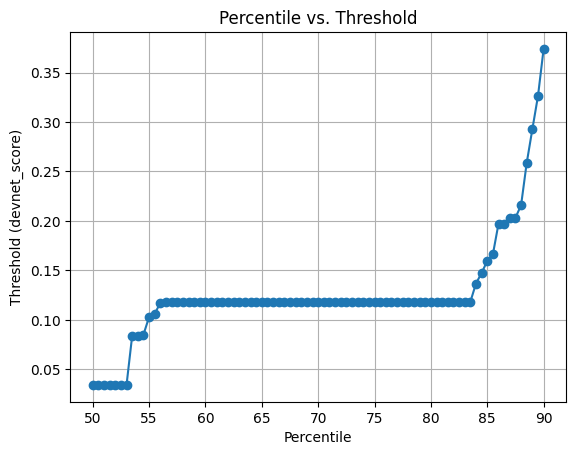

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 상위 10% ~ 50%에 해당하는 퍼센타일 (즉, 90 ~ 50)
percentiles = np.arange(50, 90.5, 0.5)
thresholds = [np.percentile(df['devnet_score'], p) for p in percentiles]

plt.figure()
plt.plot(percentiles, thresholds, marker='o')
plt.title('Percentile vs. Threshold')
plt.xlabel('Percentile')
plt.ylabel('Threshold (devnet_score)')
plt.grid(True)
plt.show()

In [ ]:
# 1) 상위 3% 컷오프(threshold) 계산
thr_97 = np.percentile(df['devnet_score'], 87.5)

# 2) y_pred 생성: 상위 3%만 1, 나머지는 -1
df['y_pred'] = np.where(df['devnet_score'] > thr_97, 1, -1)

# 3) 일치율 계산
match_rate = (df['y_pred'] == df['y_temp']).mean()
print(f"87.5th percentile threshold: {thr_97:.6f}")
print(f"전체 샘플 중 임시 라벨과의 일치율: {match_rate:.2%}")

87.5th percentile threshold: 0.203156
전체 샘플 중 임시 라벨과의 일치율: 91.40%


In [ ]:
from sklearn.metrics import confusion_matrix

# 실제 1을 positive, -1을 negative로 놓고 매트릭스 생성
tn, fp, fn, tp = confusion_matrix(df['y_temp'], df['y_pred'], labels=[-1,1]).ravel()
print(f"TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")

TP: 1844, FP: 486, FN: 1623, TN: 19460


#Test

In [ ]:
X_test = df_test[feature_cols].fillna(0).values

In [ ]:
import torch

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)  # device = 'cuda' or 'cpu'

In [ ]:
model.eval()
with torch.no_grad():
    scores, _ = model(X_test_tensor)

In [ ]:
df_test['devnet_score_pred'] = scores.cpu().numpy()

In [ ]:
df_test

,victim_count,revive_count,name,vehicle_count,Damage_Gun,Damage_Explosion_JerryCan,Damage_Molotov,Damage_VehicleHit,Damage_Punch,Damage_Explosion_C4,...,Damage_DropStructHit,Damage_Explosion_StickyBomb,Damage_Explosion_Mortar,Damage_MotorGlider,Damage_Explosion_Breach,count,y_temp,devnet_score,y_pred,devnet_score_pred
21180,1.0,0.0,MAKAR_03,8.0,0.0,0.0,21.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,1,0.006122,-1,4.304287
11869,0.0,0.0,HsinChih,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,1,1,0.012537,-1,0.426857
1692,0.0,1.0,ZGH--BHYQ,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,1,1,0.009633,-1,0.160152
17661,0.0,2.0,Sukitse999-,8.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,1,0.118551,1,0.467440
11212,0.0,0.0,Jiji_Queen,6.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,1,1,0.038275,-1,0.761436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27659,0.0,0.0,hukhikhjo,10.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0.017896,-1,0.083758
16067,0.0,0.0,feitianfoxiya,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0.000592,-1,0.449349
21809,0.0,0.0,ILCQY1,2.0,0.0,0.0,17.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,1,0.027822,-1,5.522859
19777,0.0,0.0,StayTogether9,8.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0.086231,-1,0.197289


In [ ]:
threshold = 0.203156
ratio = (df_test['devnet_score_pred'] >= threshold).mean()
print(f"{ratio:.4f}")

0.7175


In [ ]:
df_combined = pd.concat([df, df_test], ignore_index=True)

In [ ]:
df_test

,victim_count,revive_count,name,vehicle_count,Damage_Gun,Damage_Explosion_JerryCan,Damage_Molotov,Damage_VehicleHit,Damage_Punch,Damage_Explosion_C4,...,Damage_DropStructHit,Damage_Explosion_StickyBomb,Damage_Explosion_Mortar,Damage_MotorGlider,Damage_Explosion_Breach,count,y_temp,devnet_score,y_pred,devnet_score_pred
21180,1.0,0.0,MAKAR_03,8.0,0.0,0.0,21.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,1,0.006122,-1,4.304287
11869,0.0,0.0,HsinChih,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,1,1,0.012537,-1,0.426857
1692,0.0,1.0,ZGH--BHYQ,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,1,1,0.009633,-1,0.160152
17661,0.0,2.0,Sukitse999-,8.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,1,0.118551,1,0.467440
11212,0.0,0.0,Jiji_Queen,6.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,1,1,0.038275,-1,0.761436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27659,0.0,0.0,hukhikhjo,10.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0.017896,-1,0.083758
16067,0.0,0.0,feitianfoxiya,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0.000592,-1,0.449349
21809,0.0,0.0,ILCQY1,2.0,0.0,0.0,17.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,1,0.027822,-1,5.522859
19777,0.0,0.0,StayTogether9,8.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0.086231,-1,0.197289


In [ ]:
df_combined

,victim_count,revive_count,name,vehicle_count,Damage_Gun,Damage_Explosion_JerryCan,Damage_Molotov,Damage_VehicleHit,Damage_Punch,Damage_Explosion_C4,...,Damage_DropStructHit,Damage_Explosion_StickyBomb,Damage_Explosion_Mortar,Damage_MotorGlider,Damage_Explosion_Breach,count,y_temp,devnet_score,y_pred,devnet_score_pred
0,0.0,0.0,Harlotte1Ashley,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0,-1,0.034166,-1,NaN
1,0.0,0.0,ShiShiRuQi1232,10.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,1,1,0.083758,-1,NaN
2,0.0,0.0,noxixihaha11,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0,-1,0.007508,-1,NaN
3,0.0,0.0,zhouyuming1997,26.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0,-1,0.003401,-1,NaN
4,0.0,0.0,Acrecia,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0,-1,0.003346,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26874,0.0,0.0,hukhikhjo,10.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0.017896,-1,0.083758
26875,0.0,0.0,feitianfoxiya,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0.000592,-1,0.449349
26876,0.0,0.0,ILCQY1,2.0,0.0,0.0,17.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,1,0.027822,-1,5.522859
26877,0.0,0.0,StayTogether9,8.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0.086231,-1,0.197289


#Revive와의 관계

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# 예시: 협력적 지표 리스트
cooperative_cols = ['revive_count', 'victim_count']

results = []

for col in cooperative_cols:
    grp_1 = df[df['y_pred'] == 1][col]
    grp_m1 = df[df['y_pred'] == -1][col]

    # Welch's t-test
    t_stat, p_val = ttest_ind(grp_1, grp_m1, equal_var=False, nan_policy='omit')

    results.append({
        'metric': col,
        'mean_y_pred_1': grp_1.mean(),
        'mean_y_pred_-1': grp_m1.mean(),
        'p_value': p_val,
        'n_y_pred_1': len(grp_1),
        'n_y_pred_-1': len(grp_m1),
    })

result_df = pd.DataFrame(results)

In [ ]:
result_df

,metric,mean_y_pred_1,mean_y_pred_-1,p_value,n_y_pred_1,n_y_pred_-1
0,revive_count,0.513218,0.337092,5.148697e-24,2837,20576
1,victim_count,0.437434,0.367856,4.479581e-06,2837,20576
